In [154]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Code to display maximum rows and columns 

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
# Reading the dataset

house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Check for repetitive 'Id'

sum(house_df.duplicated(['Id'])==True)

0

In [8]:
# Columns to drop

col2drop = ['Id']

### Data cleaning in categorical columns without null values

In [9]:
# Columns without missing value entries

df1 = house_df.select_dtypes(include=['object']).dropna(axis=1)
df1.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### MSZoning

In [10]:
house_df.MSZoning.value_counts(normalize = True,dropna = False)*100

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

In [11]:
# Merging low frequency values

house_df.MSZoning = house_df.MSZoning.replace(['FV','RH','C (all)'],'Others')

#### Street

In [12]:
house_df.Street.value_counts(normalize = True,dropna = False)*100

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

In [13]:
# 'Street' has data imbalance hence can be dropped

col2drop.append('Street')

#### LotShape

In [14]:
house_df.LotShape.value_counts(normalize = True,dropna = False)*100

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

In [15]:
# Merging low frequency values

house_df.LotShape = house_df.LotShape.replace(['IR1','IR2','IR3'],'Irreg')

#### LandContour

In [16]:
house_df.LandContour.value_counts(normalize = True,dropna = False)*100

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

In [17]:
# 'LandContour' has data imbalance hence can be dropped

col2drop.append('LandContour')

#### Utilities

In [18]:
house_df.Utilities.value_counts(normalize = True,dropna = False)*100

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

In [19]:
# 'Utilities' has data imbalance hence can be dropped

col2drop.append('Utilities')

#### LotConfig

In [20]:
house_df.LotConfig.value_counts(normalize = True,dropna = False)*100

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

In [21]:
# Merging low frequency values

house_df.LotConfig = house_df.LotConfig.replace(['CulDSac','FR2','FR3'],'OtherConfig')

#### LandSlope

In [22]:
house_df.LandSlope.value_counts(normalize = True,dropna = False)*100

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

In [23]:
# 'LandSlope' has data imbalance hence can be dropped

col2drop.append('LandSlope')

#### Neighborhood

In [24]:
house_df.Neighborhood.value_counts(normalize = True,dropna = False)*100

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
Blmngtn     1.164384
MeadowV     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64

In [25]:
# 'Neighborhood' column have large number of values with small frequencies, hence can be considered for dropping

col2drop.append('Neighborhood')

#### Condition1

In [26]:
house_df.Condition1.value_counts(normalize = True,dropna = False)*100

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64

In [27]:
# 'Condition1' has data imbalance hence can be dropped

col2drop.append('Condition1')

#### Condition2

In [28]:
house_df.Condition2.value_counts(normalize = True,dropna = False)*100

Norm      98.972603
Feedr      0.410959
Artery     0.136986
PosN       0.136986
RRNn       0.136986
PosA       0.068493
RRAn       0.068493
RRAe       0.068493
Name: Condition2, dtype: float64

In [29]:
# 'Condition2' has data imbalance hence can be dropped

col2drop.append('Condition2')

#### BldgType

In [30]:
house_df.BldgType.value_counts(normalize = True,dropna = False)*100

1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64

In [31]:
# 'BldgType' has data imbalance hence can be dropped

col2drop.append('BldgType')

#### HouseStyle

In [32]:
house_df.HouseStyle.value_counts(normalize = True,dropna = False)*100

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64

In [33]:
# Merging low frequency values

house_df.HouseStyle.replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],'OtherStyles',inplace = True)

#### RoofStyle

In [34]:
house_df.RoofStyle.value_counts(normalize = True,dropna = False)*100

Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64

In [35]:
# Since 'RoofStyle' column is predominantly weighed towards one value, it can be dropped

col2drop.append('RoofStyle')

#### RoofMatl

In [36]:
house_df.RoofMatl.value_counts(normalize = True,dropna = False)*100

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Metal       0.068493
Membran     0.068493
ClyTile     0.068493
Roll        0.068493
Name: RoofMatl, dtype: float64

In [37]:
# 'RoofMatl' has data imbalance hence can be dropped

col2drop.append('RoofMatl')

#### Exterior1st

In [38]:
house_df.Exterior1st.value_counts(normalize = True,dropna = False)*100

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
CBlock      0.068493
AsphShn     0.068493
ImStucc     0.068493
Name: Exterior1st, dtype: float64

In [39]:
# Merging lower frequency columns

house_df.Exterior1st.replace(['Plywood','CemntBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','ImStucc','AsphShn','CBlock'],'Others',inplace = True)

#### Exterior2nd

In [40]:
house_df.Exterior2nd.value_counts(normalize = True,dropna = False)*100

VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
CBlock      0.068493
Other       0.068493
Name: Exterior2nd, dtype: float64

In [41]:
# Merging lower frequency columns

house_df.Exterior2nd.replace(['Plywood','CmentBd','BrkFace','Wd Shng','Stucco','AsbShng','Brk Cmn','Stone','ImStucc','AsphShn','Other','CBlock'],'Others',inplace = True)

#### ExterQual

In [42]:
house_df.ExterQual.value_counts(normalize = True,dropna = False)*100

TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64

In [43]:
# Merging lower frequency columns; Fair can be merged with Typical/Average quality; Excellent can be merged with Good quality

house_df.ExterQual.replace('Fa','TA',inplace = True)
house_df.ExterQual.replace('Ex','Gd',inplace = True)

#### ExterCond

In [44]:
house_df.ExterCond.value_counts(normalize = True,dropna = False)*100

TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64

In [45]:
# 'ExterCond' has data imbalance hence can be dropped

col2drop.append('ExterCond')

#### Foundation

In [46]:
house_df.Foundation.value_counts(normalize = True,dropna = False)*100

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64

In [47]:
# Merging low frequency values

house_df.Foundation.replace(['BrkTil','Slab','Stone','Wood'],'Others', inplace=True)

#### Heating

In [48]:
house_df.Heating.value_counts(normalize = True,dropna = False)*100

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64

In [49]:
# 'Heating' has data imbalance hence can be dropped

col2drop.append('Heating')

#### HeatingQC

In [50]:
house_df.HeatingQC.value_counts(normalize = True,dropna = False)*100

Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64

In [51]:
# Merging low frequecy values

house_df.HeatingQC.replace(['Fa','Po','TA'],'TA/Po',inplace=True)
house_df.HeatingQC.replace(['Ex','Gd'],'Ex/Gd',inplace=True)

#### CentralAir

In [52]:
house_df.CentralAir.value_counts(normalize = True,dropna = False)*100

Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64

In [53]:
# 'CentralAir' has data imbalance hence can be dropped

col2drop.append('CentralAir')

#### KitchenQual

In [54]:
house_df.KitchenQual.value_counts(normalize = True,dropna = False)*100

TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64

In [55]:
# Merging low frequecy values

house_df.KitchenQual.replace(['Fa','TA'],'TA/Fa',inplace=True)
house_df.KitchenQual.replace(['Ex','Gd'],'Ex/Gd',inplace=True)

#### Functional

In [56]:
house_df.Functional.value_counts(normalize = True,dropna = False)*100

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64

In [57]:
# 'Functional' has data imbalance hence can be dropped

col2drop.append('Functional')

#### PavedDrive

In [58]:
house_df.PavedDrive.value_counts(normalize = True,dropna = False)*100

Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64

In [59]:
# 'PavedDrive' has data imbalance hence can be dropped

col2drop.append('PavedDrive')

#### SaleType

In [60]:
house_df.SaleType.value_counts(normalize = True,dropna = False)*100

WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLw     0.342466
ConLI     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64

In [61]:
# 'SaleType' has data imbalance hence can be dropped

col2drop.append('SaleType')

#### SaleCondition

In [62]:
house_df.SaleCondition.value_counts(normalize = True,dropna = False)*100

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64

In [63]:
# 'SaleCondition' has data imbalance hence can be dropped

col2drop.append('SaleCondition')

### Check for  null values in categorical columns

In [64]:
# Percentage of null values in categorical columns

round(100*house_df.select_dtypes(include=['object']).isnull().sum()/len(house_df.select_dtypes(include=['object'])),2).sort_values(ascending = False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageFinish      5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtQual          2.53
BsmtCond          2.53
MasVnrType        0.55
Electrical        0.07
Functional        0.00
KitchenQual       0.00
CentralAir        0.00
HeatingQC         0.00
Heating           0.00
PavedDrive        0.00
SaleType          0.00
MSZoning          0.00
Street            0.00
Condition2        0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
BldgType          0.00
Foundation        0.00
HouseStyle        0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond         0.00
SaleCondition     0.00
dtype: floa

#### PoolQC

In [65]:
house_df.PoolQC.value_counts(normalize = True,dropna = False)*100

NaN    99.520548
Gd      0.205479
Ex      0.136986
Fa      0.136986
Name: PoolQC, dtype: float64

In [66]:
# 'PoolQC' has data imbalance hence can be dropped

col2drop.append('PoolQC')

#### MiscFeature

In [67]:
house_df.MiscFeature.value_counts(normalize = True,dropna = False)*100

NaN     96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64

In [68]:
# 'MiscFeature' has data imbalance hence can be dropped

col2drop.append('MiscFeature')

#### Alley

In [69]:
house_df.Alley.value_counts(normalize = True,dropna = False)*100

NaN     93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64

In [70]:
# 'Alley' has data imbalance hence can be dropped

col2drop.append('Alley')

#### Fence

In [71]:
house_df.Fence.value_counts(normalize = True,dropna = False)*100

NaN      80.753425
MnPrv    10.753425
GdPrv     4.041096
GdWo      3.698630
MnWw      0.753425
Name: Fence, dtype: float64

In [72]:
# 'Fence' has data imbalance hence can be dropped

col2drop.append('Fence')

#### FireplaceQu

In [73]:
house_df.FireplaceQu.value_counts(normalize = True,dropna = False)*100

NaN    47.260274
Gd     26.027397
TA     21.438356
Fa      2.260274
Ex      1.643836
Po      1.369863
Name: FireplaceQu, dtype: float64

In [74]:
# Convering 'NaN' to meaningful category

house_df.FireplaceQu.replace(np.nan, 'No_Fireplace',inplace=True)

# Merging low frequency values

house_df.FireplaceQu.replace(['Fa','Po','TA'],'TA/Fa/Po',inplace=True)
house_df.FireplaceQu.replace(['Ex','Gd'],'Ex/Gd',inplace=True)

In [75]:
house_df.FireplaceQu.value_counts(normalize = True,dropna = False)*100

No_Fireplace    47.260274
Ex/Gd           27.671233
TA/Fa/Po        25.068493
Name: FireplaceQu, dtype: float64

#### 'Garage' related features

In [76]:
house_df.GarageQual.value_counts(normalize = True,dropna = False)*100

TA     89.794521
NaN     5.547945
Fa      3.287671
Gd      0.958904
Ex      0.205479
Po      0.205479
Name: GarageQual, dtype: float64

In [77]:
# 'GarageQual' has data imbalance hence can be dropped

col2drop.append('GarageQual')

In [78]:
house_df.GarageType.value_counts(normalize = True,dropna = False)*100

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NaN         5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [79]:
# Convering 'NaN' to meaningful category

house_df.GarageType = house_df.GarageType.replace(np.nan, 'No_Garage')

# Merging low frequency values

house_df.GarageType = house_df.GarageType.replace(['BuiltIn','No_Garage','Basement','CarPort','2Types'],'Others')

In [80]:
house_df.GarageFinish.value_counts(normalize = True,dropna = False)*100

Unf    41.438356
RFn    28.904110
Fin    24.109589
NaN     5.547945
Name: GarageFinish, dtype: float64

In [81]:
# Convering 'NaN' to meaningful category

house_df.GarageFinish = house_df.GarageFinish.replace(np.nan, 'No_Garage')

In [82]:
house_df.GarageCond.value_counts(normalize = True,dropna = False)*100

TA     90.821918
NaN     5.547945
Fa      2.397260
Gd      0.616438
Po      0.479452
Ex      0.136986
Name: GarageCond, dtype: float64

In [83]:
# 'GarageCond' has data imbalance hence can be dropped

col2drop.append('GarageCond')

#### 'Basement' related features

In [84]:
house_df.BsmtExposure.value_counts(normalize = True,dropna = False)*100

No     65.273973
Av     15.136986
Gd      9.178082
Mn      7.808219
NaN     2.602740
Name: BsmtExposure, dtype: float64

In [85]:
# Convering 'NaN' to meaningful category

house_df.BsmtExposure = house_df.BsmtExposure.replace(np.nan, 'No_Basement')

# Merging low frequency values

house_df.BsmtExposure.replace(['Gd','Av'],'Gd/Avg',inplace=True)
house_df.BsmtExposure.replace(['Mn','No','No_Basement'],'Min/Nil',inplace=True)

In [86]:
house_df.BsmtFinType2.value_counts(normalize = True,dropna = False)*100

Unf    86.027397
Rec     3.698630
LwQ     3.150685
NaN     2.602740
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [87]:
# 'BsmtFinType2' has data imbalance hence can be dropped

col2drop.append('BsmtFinType2')

In [88]:
house_df.BsmtFinType1.value_counts(normalize = True,dropna = False)*100

Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
NaN     2.534247
Name: BsmtFinType1, dtype: float64

In [89]:
# Convering 'NaN' to meaningful category

house_df.BsmtFinType1 = house_df.BsmtFinType1.replace(np.nan, 'No_Basement')

# Merging low frequency values

house_df.BsmtFinType1 = house_df.BsmtFinType1.replace(['Rec','LwQ','No_Basement'],'Others')

In [90]:
house_df.BsmtCond.value_counts(normalize = True,dropna = False)*100

TA     89.794521
Gd      4.452055
Fa      3.082192
NaN     2.534247
Po      0.136986
Name: BsmtCond, dtype: float64

In [91]:
# 'BsmtCond' has data imbalance hence can be dropped

col2drop.append('BsmtCond')

In [92]:
house_df.BsmtQual.value_counts(normalize = True,dropna = False)*100

TA     44.452055
Gd     42.328767
Ex      8.287671
NaN     2.534247
Fa      2.397260
Name: BsmtQual, dtype: float64

In [93]:
# Convering 'NaN' to meaningful category

house_df.BsmtQual = house_df.BsmtQual.replace(np.nan, 'No_Basement')

# Merging low frequency values

house_df.BsmtQual.replace(['Gd','Ex'],'Gd/Ex',inplace=True)
house_df.BsmtQual.replace(['TA','Fa','No_Basement'],'TA/Fa/Nil',inplace=True)

#### 'Masonry Veneer Type' 

In [94]:
house_df.MasVnrType.value_counts(normalize = True,dropna = False)*100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
NaN         0.547945
Name: MasVnrType, dtype: float64

In [95]:
# Convering 'NaN' to meaningful category

house_df.MasVnrType = house_df.MasVnrType.replace(np.nan, 'None')

# Merging low frequency values

house_df.MasVnrType = house_df.MasVnrType.replace(['Stone','BrkCmn'],'Others')

#### Electrical system

In [96]:
house_df.Electrical.value_counts(normalize = True,dropna = False)*100

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
NaN       0.068493
Mix       0.068493
Name: Electrical, dtype: float64

In [97]:
# 'Electrical' has data imbalance hence can be dropped

col2drop.append('Electrical')

### Check for  null values in numerical columns

In [98]:
# Percentage of null values in numerical columns

round(100*house_df.select_dtypes(include=['int64','float64']).isnull().sum()/len(house_df.select_dtypes(include=['int64','float64'])),2).sort_values(ascending = False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrArea        0.55
Id                0.00
OpenPorchSF       0.00
KitchenAbvGr      0.00
TotRmsAbvGrd      0.00
Fireplaces        0.00
GarageCars        0.00
GarageArea        0.00
WoodDeckSF        0.00
EnclosedPorch     0.00
HalfBath          0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
BedroomAbvGr      0.00
FullBath          0.00
MSSubClass        0.00
BsmtFinSF2        0.00
LotArea           0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
BsmtFinSF1        0.00
BsmtUnfSF         0.00
BsmtHalfBath      0.00
TotalBsmtSF       0.00
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea         0.00
BsmtFullBath      0.00
SalePrice         0.00
dtype: float64

In [99]:
# Dropping miscellaneous year and month columns

col2drop.extend(['GarageYrBlt','MoSold','YrSold','YearRemodAdd'])

# Deriving the 'houseAge' from 'YearBuilt'
house_df['houseAge'] = pd.Timestamp('now').year - house_df.YearBuilt
col2drop.append('YearBuilt')
col2drop

['Id',
 'Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'Heating',
 'CentralAir',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'GarageQual',
 'GarageCond',
 'BsmtFinType2',
 'BsmtCond',
 'Electrical',
 'GarageYrBlt',
 'MoSold',
 'YrSold',
 'YearRemodAdd',
 'YearBuilt']

In [100]:
house_df.LotFrontage.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
max       313.000000
Name: LotFrontage, dtype: float64

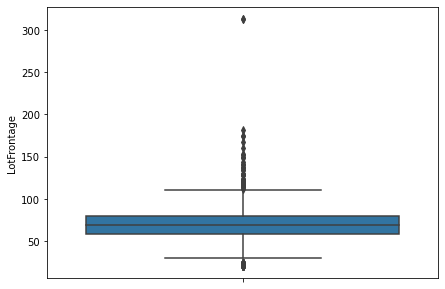

In [101]:
plt.figure(figsize=(7,5))
sns.boxplot(y = house_df['LotFrontage'])
plt.show()

In [102]:
# Imputing missing  entries by median

house_df.LotFrontage.fillna(house_df.LotFrontage.median(), inplace = True)

In [103]:
house_df.MasVnrArea.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
95%       456.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

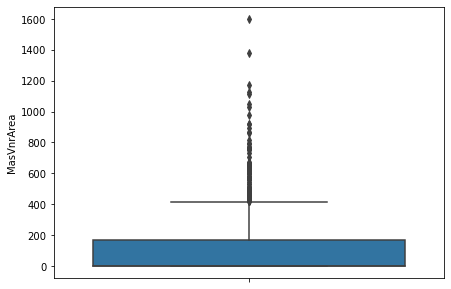

In [104]:
plt.figure(figsize=(7,5))
sns.boxplot(y = house_df['MasVnrArea'])
plt.show()

In [105]:
# Imputing missing  entries by median

house_df.MasVnrArea.fillna(house_df.MasVnrArea.median(), inplace = True)

#### Comments
Skewed numerical data is preferably imputed with median values

In [106]:
house_df.drop(col2drop, axis=1, inplace=True)
print(house_df.shape)
house_df.head()

(1460, 50)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,houseAge
0,60,RL,65.0,8450,Reg,Inside,2Story,7,5,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd/Ex,Min/Nil,GLQ,706,0,150,856,Ex/Gd,856,854,0,1710,1,0,2,1,3,1,Ex/Gd,8,0,No_Fireplace,Attchd,RFn,2,548,0,61,0,0,0,0,0,208500,18
1,20,RL,80.0,9600,Reg,OtherConfig,1Story,6,8,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd/Ex,Gd/Avg,ALQ,978,0,284,1262,Ex/Gd,1262,0,0,1262,0,1,2,0,3,1,TA/Fa,6,1,TA/Fa/Po,Attchd,RFn,2,460,298,0,0,0,0,0,0,181500,45
2,60,RL,68.0,11250,Irreg,Inside,2Story,7,5,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd/Ex,Min/Nil,GLQ,486,0,434,920,Ex/Gd,920,866,0,1786,1,0,2,1,3,1,Ex/Gd,6,1,TA/Fa/Po,Attchd,RFn,2,608,0,42,0,0,0,0,0,223500,20
3,70,RL,60.0,9550,Irreg,Corner,2Story,7,5,Wd Sdng,Others,None,0.0,TA,Others,TA/Fa/Nil,Min/Nil,ALQ,216,0,540,756,Ex/Gd,961,756,0,1717,1,0,1,0,3,1,Ex/Gd,7,1,Ex/Gd,Detchd,Unf,3,642,0,35,272,0,0,0,0,140000,106
4,60,RL,84.0,14260,Irreg,OtherConfig,2Story,8,5,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd/Ex,Gd/Avg,GLQ,655,0,490,1145,Ex/Gd,1145,1053,0,2198,1,0,2,1,4,1,Ex/Gd,9,1,TA/Fa/Po,Attchd,RFn,3,836,192,84,0,0,0,0,0,250000,21


In [107]:
# Percentage of null values in categorical columns

round(100*house_df.isnull().sum()/len(house_df),2).sort_values(ascending = False)

MSSubClass       0.0
GarageType       0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageFinish     0.0
MSZoning         0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
SalePrice        0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF  

In [108]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  MasVnrType     1460 non-null   object 
 12  MasVnrArea     1460 non-null   float64
 13  ExterQual      1460 non-null   object 
 14  Foundation     1460 non-null   object 
 15  BsmtQual       1460 non-null   object 
 16  BsmtExposure   1460 non-null   object 
 17  BsmtFinType1   1460 non-null   object 
 18  BsmtFinS

In [109]:
house_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,houseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,49.732192
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,11.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,21.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,48.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,67.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000,96.100000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000,105.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,121.820000


#### Comments:
- Significant number of columns can be identified with outliers, hence outlier treatment needs to be performed. 
###### Variables which has significant outliers are : 'LotArea','BsmtFinSF1','BsmtFinSF2','LowQualFinSF','PoolArea','MiscVal'	
- 'LotArea' Columns has a significant outlier with a value of 215245 sq.ft, also has a very high difference between 99th percentile and the maximum value. Hence outlier treatment is performed on 1 variable at a time and followed by rechecking for outliers.

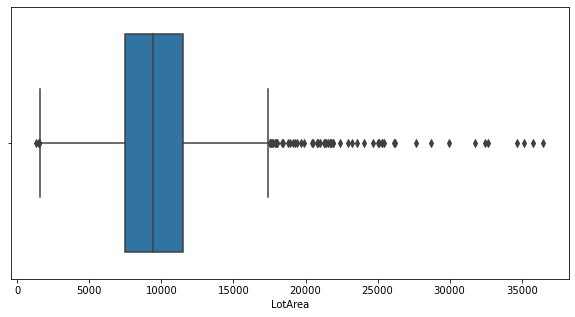

In [115]:
# Outlier detection in 'LotArea' column

plt.figure(figsize=(10,5))
sns.boxplot(x=house_df['LotArea'])
plt.show()

#### Outlier Treatment: Removing top 1% of the outlier values

In [110]:
# Outlier treatment on 'LotArea'

Q99 = house_df.LotArea.quantile(0.99)
house_df = house_df[(house_df.LotArea <= Q99)]

In [117]:
# Rechecking for outliers

house_df.LotArea.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count     1445.000000
mean      9776.588927
std       4238.856255
min       1300.000000
25%       7500.000000
50%       9430.000000
75%      11475.000000
90%      14133.000000
95%      16557.000000
99%      25201.960000
max      36500.000000
Name: LotArea, dtype: float64

#### Comments
There has been significant reduction in outliers in 'LotArea'

In [118]:
# Outlier treatment on 'PoolArea'

Q99 = house_df.PoolArea.quantile(0.99)
house_df = house_df[(house_df.PoolArea <= Q99)]

In [119]:
# Rechecking for outliers

house_df.PoolArea.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    1439.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
90%         0.0
95%         0.0
99%         0.0
max         0.0
Name: PoolArea, dtype: float64

#### Comments
With the reduction in outliers in 'PoolArea', the variance in 'PoolArea' reduces to 0. Hence can be dropped

In [124]:
# Dropping the 'PoolArea' column

house_df.drop('PoolArea', axis=1, inplace=True)

In [121]:
# Outlier treatment on 'MiscVal'

Q99 = house_df.MiscVal.quantile(0.99)
house_df = house_df[(house_df.MiscVal <= Q99)]

In [122]:
# Rechecking for outliers

house_df.MiscVal.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    1426.000000
mean       12.232819
std        78.542989
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
95%         0.000000
99%       500.000000
max       700.000000
Name: MiscVal, dtype: float64

#### Comments
There has been significant reduction in outliers in 'MiscVal'

In [123]:
# Rechecking for outliers

house_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,houseAge
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.0,1426.000000,1426.000000,1426.000000
mean,56.988079,69.491585,9737.598878,6.089060,5.563815,102.528752,432.398317,44.878682,571.392707,1048.669705,1154.131837,341.500000,5.708976,1501.340813,0.416550,0.057504,1.560309,0.384292,2.858345,1.046283,6.492987,0.596774,1.764376,471.184432,91.803647,45.913745,21.706872,3.490884,14.185133,0.0,12.232819,179425.298738,49.514727
std,42.338973,20.825935,4218.735318,1.376415,1.108403,179.100986,428.002210,158.545060,443.579890,411.623900,369.698775,430.447608,48.116119,496.330103,0.512695,0.238834,0.545034,0.502211,0.808458,0.219961,1.599656,0.631981,0.748721,212.666698,120.955230,64.042893,59.771304,29.660232,52.783671,0.0,78.542989,77261.188032,30.237797
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34900.000000,11.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,0.000000,227.500000,795.000000,879.250000,0.000000,0.000000,1126.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,326.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,129600.000000,20.000000
50%,50.000000,69.000000,9391.000000,6.000000,5.000000,0.000000,377.500000,0.000000,482.500000,989.000000,1080.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.500000,0.000000,0.000000,0.000000,0.0,0.000000,162000.000000,48.000000
75%,70.000000,79.000000,11433.250000,7.000000,6.000000,164.750000,704.750000,0.000000,811.000000,1277.750000,1381.750000,728.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,212000.000000,67.000000
90%,120.000000,92.000000,14106.000000,8.000000,7.000000,326.000000,1054.500000,96.000000,1235.500000,1594.500000,1668.000000,934.500000,0.000000,2133.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.500000,1.000000,3.000000,753.500000,256.000000,130.000000,112.000000,0.000000,0.000000,0.0,0.000000,275750.000000,96.000000
95%,160.000000,103.000000,16444.750000,8.000000,8.000000,446.750000,1255.750000,391.000000,1469.500000,1740.000000,1809.000000,1121.750000,0.000000,2417.750000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,3.000000,845.500000,325.750000,171.500000,180.000000,0.000000,153.750000,0.0,0.000000,325000.000000,105.000000
99%,190.000000,130.000000,25071.250000,9.750000,9.000000,784.000000,1534.500000,815.000000,1798.750000,2118.250000,2186.500000,1360.750000,328.500000,2933.250000,1.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,992.000000,475.500000,272.250000,257.750000,168.000000,262.250000,0.0,500.000000,438373.500000,122.500000


#### Comments
There has been significant reduction in outliers except the target variable - 'SalePrice' and hence we can proceed with scaling.

### Creating dummy variables for categorical variables 

In [127]:
# Selecting categorical variables

categ_cols = house_df.select_dtypes(include=['object']).columns
house_categ = house_df[categ_cols]
house_categ.head()

,MSZoning,LotShape,LotConfig,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,RL,Reg,Inside,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd/Ex,Min/Nil,GLQ,Ex/Gd,Ex/Gd,No_Fireplace,Attchd,RFn
1,RL,Reg,OtherConfig,1Story,MetalSd,MetalSd,None,TA,CBlock,Gd/Ex,Gd/Avg,ALQ,Ex/Gd,TA/Fa,TA/Fa/Po,Attchd,RFn
2,RL,Irreg,Inside,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd/Ex,Min/Nil,GLQ,Ex/Gd,Ex/Gd,TA/Fa/Po,Attchd,RFn
3,RL,Irreg,Corner,2Story,Wd Sdng,Others,None,TA,Others,TA/Fa/Nil,Min/Nil,ALQ,Ex/Gd,Ex/Gd,Ex/Gd,Detchd,Unf
4,RL,Irreg,OtherConfig,2Story,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd/Ex,Gd/Avg,GLQ,Ex/Gd,Ex/Gd,TA/Fa/Po,Attchd,RFn


In [128]:
# Creating dummies - one hot encoding

dummies_df = pd.get_dummies(house_categ, drop_first=True)

In [129]:
# Dropping categorical variables 

new_df = house_df.drop(list(house_categ.columns), axis=1)

In [130]:
# Concat new_df and dummies_df

new_df = pd.concat([new_df, dummies_df], axis=1)
new_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,houseAge,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_OtherConfig,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_OtherStyles,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,ExterQual_TA,Foundation_Others,Foundation_PConc,BsmtQual_TA/Fa/Nil,BsmtExposure_Min/Nil,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Unf,HeatingQC_TA/Po,KitchenQual_TA/Fa,FireplaceQu_No_Fireplace,FireplaceQu_TA/Fa/Po,GarageType_Basment,GarageType_Detchd,GarageType_Others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,208500,18,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,181500,45,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,223500,20,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,140000,106,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,250000,21,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [131]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSSubClass                1426 non-null   int64  
 1   LotFrontage               1426 non-null   float64
 2   LotArea                   1426 non-null   int64  
 3   OverallQual               1426 non-null   int64  
 4   OverallCond               1426 non-null   int64  
 5   MasVnrArea                1426 non-null   float64
 6   BsmtFinSF1                1426 non-null   int64  
 7   BsmtFinSF2                1426 non-null   int64  
 8   BsmtUnfSF                 1426 non-null   int64  
 9   TotalBsmtSF               1426 non-null   int64  
 10  1stFlrSF                  1426 non-null   int64  
 11  2ndFlrSF                  1426 non-null   int64  
 12  LowQualFinSF              1426 non-null   int64  
 13  GrLivArea                 1426 non-null   int64  
 14  BsmtFull

#### 'new_df' is the final dataframe considered for preprocessing and model building

## Model building

### Test-Train split

In [132]:
# Putting feature variables to X

X = new_df.drop('SalePrice', axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,houseAge,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_OtherConfig,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_OtherStyles,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,ExterQual_TA,Foundation_Others,Foundation_PConc,BsmtQual_TA/Fa/Nil,BsmtExposure_Min/Nil,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Unf,HeatingQC_TA/Po,KitchenQual_TA/Fa,FireplaceQu_No_Fireplace,FireplaceQu_TA/Fa/Po,GarageType_Basment,GarageType_Detchd,GarageType_Others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,18,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,45,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,20,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,106,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,21,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [133]:
# Putting response variable to y

y = new_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

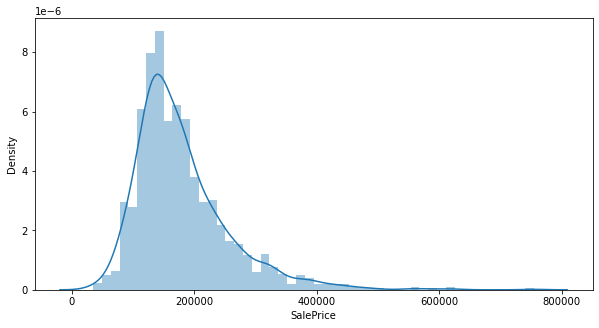

1.763205336213081

In [144]:
# Check for skewness in the data

plt.figure(figsize=(10,5))
sns.distplot(y)
plt.show()
y.skew()

#### Log transform on target variable to reduce skewness

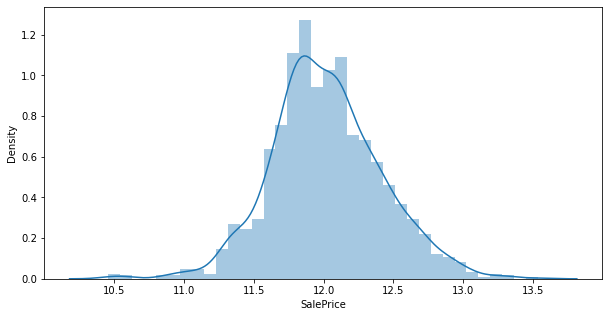

0.1021778858744582

In [145]:
y = np.log(y)

plt.figure(figsize=(10,5))
sns.distplot(y)
plt.show()
y.skew()

#### Comment:
Significant reduction in skewness is achieved through log transformation

In [212]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [213]:
# Extracting numerical columns for feature scaling

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'houseAge'],
      dtype='object')

In [214]:
# Feature Scaling on X_train dataset

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,houseAge,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_OtherConfig,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_OtherStyles,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,ExterQual_TA,Foundation_Others,Foundation_PConc,BsmtQual_TA/Fa/Nil,BsmtExposure_Min/Nil,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Unf,HeatingQC_TA/Po,KitchenQual_TA/Fa,FireplaceQu_No_Fireplace,FireplaceQu_TA/Fa/Po,GarageType_Basment,GarageType_Detchd,GarageType_Others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf
126,1.537287,-0.031313,-1.192488,-0.083577,-0.519376,-0.584202,-0.728753,-0.272548,0.856015,0.062594,-0.545063,-0.812403,-0.116505,-1.131130,-0.823135,-0.223031,0.805564,-0.769504,-1.069523,-0.220558,-0.942622,0.650077,0.320849,-0.151720,-0.772547,2.498695,-0.3556,-0.12565,-0.256542,-0.150961,-0.145666,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0
731,0.562565,0.174959,-0.054793,0.661151,-0.519376,2.034974,0.819575,-0.272548,-1.111524,-0.455719,-0.029293,-0.812403,-0.116505,-0.749082,1.114338,-0.223031,0.805564,-0.769504,0.144793,-0.220558,-0.328965,0.650077,0.320849,-0.161033,0.534388,-0.383901,-0.3556,-0.12565,-0.256542,-0.150961,-1.024358,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1313,0.075204,1.979835,1.210288,2.150607,-0.519376,0.393545,-1.007732,-0.272548,1.833046,0.840064,0.727902,1.902245,-0.116505,2.203666,-0.823135,-0.223031,0.805564,1.189590,1.359109,-0.220558,2.125664,0.650077,1.671937,1.426797,4.683910,-0.257886,-0.3556,-0.12565,-0.256542,-0.150961,-0.894181,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
148,-0.899518,-0.340720,-0.564828,0.661151,-0.519376,0.126887,0.573144,-0.272548,-0.397281,0.067531,-0.210361,-0.812403,-0.116505,-0.883205,1.114338,-0.223031,-1.038365,-0.769504,0.144793,-0.220558,-0.328965,-0.947895,-2.381325,-2.200532,-0.772547,-0.730443,-0.3556,-0.12565,-0.256542,-0.150961,-1.056902,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0
1106,-0.899518,2.289243,0.132382,0.661151,-0.519376,-0.584202,0.707984,-0.272548,-0.909380,-0.352056,0.782771,-0.812403,-0.116505,-0.147559,1.114338,-0.223031,0.805564,-0.769504,0.144793,-0.220558,-0.328965,0.650077,0.320849,1.147413,-0.772547,3.113018,-0.3556,-0.12565,-0.256542,-0.150961,-0.601284,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


### RFE to reduce the number of predictors

In [215]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# RFE
rfe = RFE(lr, 40)             
rfe = rfe.fit(X_train, y_train)

In [216]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 15),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 5),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 10),
 ('BsmtUnfSF', False, 13),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 12),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 23),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 16),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 14),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 18),
 ('OpenPorchSF', False, 26),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', False, 27),
 ('ScreenPorch', True, 1),
 ('MiscVal', False, 22),
 ('houseAge', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_Reg', False, 20),
 ('LotConfig_Inside', False, 29),
 ('LotConfig_OtherConfig', True, 1),
 ('HouseStyle_

In [217]:
# Selecting significant variables

col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'EnclosedPorch', 'ScreenPorch', 'houseAge', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_OtherConfig', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Others',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_Others',
       'Foundation_Others', 'Foundation_PConc', 'BsmtExposure_Min/Nil',
       'HeatingQC_TA/Po', 'KitchenQual_TA/Fa', 'FireplaceQu_No_Fireplace',
       'FireplaceQu_TA/Fa/Po', 'GarageType_Basment', 'GarageType_Detchd',
       'GarageFinish_No_Garage', 'GarageFinish_Unf'],
      dtype='object')

In [218]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtHalfBath', 'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'MiscVal', 'LotShape_Reg',
       'LotConfig_Inside', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_OtherStyles', 'Exterior1st_MetalSd', 'Exterior1st_Others',
       'MasVnrType_None', 'ExterQual_TA', 'BsmtQual_TA/Fa/Nil',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_Others',
       'BsmtFinType1_Unf', 'GarageType_Others', 'GarageFinish_RFn'],
      dtype='object')

In [219]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,EnclosedPorch,ScreenPorch,houseAge,MSZoning_RL,MSZoning_RM,LotConfig_OtherConfig,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_Others,Foundation_Others,Foundation_PConc,BsmtExposure_Min/Nil,HeatingQC_TA/Po,KitchenQual_TA/Fa,FireplaceQu_No_Fireplace,FireplaceQu_TA/Fa/Po,GarageType_Basment,GarageType_Detchd,GarageFinish_No_Garage,GarageFinish_Unf
126,-0.031313,-1.192488,-0.083577,-0.519376,-0.728753,0.062594,-0.545063,-0.812403,-1.131130,-0.823135,0.805564,-0.769504,-0.220558,-0.942622,0.320849,-0.151720,-0.3556,-0.256542,-0.145666,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0
731,0.174959,-0.054793,0.661151,-0.519376,0.819575,-0.455719,-0.029293,-0.812403,-0.749082,1.114338,0.805564,-0.769504,-0.220558,-0.328965,0.320849,-0.161033,-0.3556,-0.256542,-1.024358,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1313,1.979835,1.210288,2.150607,-0.519376,-1.007732,0.840064,0.727902,1.902245,2.203666,-0.823135,0.805564,1.189590,-0.220558,2.125664,1.671937,1.426797,-0.3556,-0.256542,-0.894181,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
148,-0.340720,-0.564828,0.661151,-0.519376,0.573144,0.067531,-0.210361,-0.812403,-0.883205,1.114338,-1.038365,-0.769504,-0.220558,-0.328965,-2.381325,-2.200532,-0.3556,-0.256542,-1.056902,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0
1106,2.289243,0.132382,0.661151,-0.519376,0.707984,-0.352056,0.782771,-0.812403,-0.147559,1.114338,0.805564,-0.769504,-0.220558,-0.328965,0.320849,1.147413,-0.3556,-0.256542,-0.601284,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0


In [220]:
X_train_rfe.shape

(998, 40)

#### Creating X_test_rfe dataframe

In [224]:
# Feature Scaling on X_test dataset

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,houseAge,MSZoning_RL,MSZoning_RM,LotShape_Reg,LotConfig_Inside,LotConfig_OtherConfig,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_OtherStyles,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_None,MasVnrType_Others,ExterQual_TA,Foundation_Others,Foundation_PConc,BsmtQual_TA/Fa/Nil,BsmtExposure_Min/Nil,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Others,BsmtFinType1_Unf,HeatingQC_TA/Po,KitchenQual_TA/Fa,FireplaceQu_No_Fireplace,FireplaceQu_TA/Fa/Po,GarageType_Basment,GarageType_Detchd,GarageType_Others,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf
1292,0.318885,-0.495424,-0.784460,-0.828305,-1.440046,-0.584202,-1.007732,-0.272548,0.936872,-0.144731,0.607190,1.480171,-0.116505,1.742362,-0.823135,-0.223031,0.805564,-0.769504,1.359109,4.181774,2.739321,-0.947895,-1.030238,-0.188971,-0.772547,3.790349,-0.355600,-0.12565,-0.256542,-0.150961,2.588042,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0
990,0.075204,0.639070,-0.088470,1.405879,-0.519376,1.922385,1.489122,-0.272548,-0.572472,0.847468,0.686750,1.459414,-0.116505,1.783006,1.114338,-0.223031,0.805564,1.189590,0.144793,-0.220558,0.284693,0.650077,1.671937,1.850528,-0.772547,0.372190,-0.355600,-0.12565,-0.256542,-0.150961,-0.829093,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
417,0.318885,0.845342,3.076185,-0.083577,0.401294,-0.584202,1.614663,-0.272548,-0.752156,0.783296,0.585242,2.079839,-0.116505,2.254470,1.114338,-0.223031,0.805564,1.189590,1.359109,-0.220558,2.125664,0.650077,1.671937,1.822590,-0.772547,-0.730443,-0.355600,-0.12565,-0.256542,-0.150961,1.741894,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1
425,0.075204,-0.495424,-1.570743,0.661151,2.242634,-0.584202,-1.007732,-0.272548,0.166478,-0.991309,-1.233671,0.760571,-0.116505,-0.255264,-0.823135,-0.223031,-1.038365,1.189590,0.144793,-0.220558,-0.328965,2.248049,-1.030238,-1.082998,-0.772547,-0.730443,1.718521,-0.12565,-0.256542,-0.150961,0.830658,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
691,0.075204,1.773564,2.860213,2.895335,0.401294,6.348911,2.374878,-0.272548,0.925642,3.434098,3.531716,3.505202,-0.116505,5.692907,-0.823135,4.141377,2.649493,1.189590,1.359109,-0.220558,2.125664,2.248049,1.671937,1.673585,2.347762,0.057152,-0.355600,-0.12565,-0.256542,-0.150961,-0.731460,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [225]:
# Creating X_test_rfe dataframe with RFE selected variables

X_test_rfe = X_test[col]
X_test_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,EnclosedPorch,ScreenPorch,houseAge,MSZoning_RL,MSZoning_RM,LotConfig_OtherConfig,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_Others,Foundation_Others,Foundation_PConc,BsmtExposure_Min/Nil,HeatingQC_TA/Po,KitchenQual_TA/Fa,FireplaceQu_No_Fireplace,FireplaceQu_TA/Fa/Po,GarageType_Basment,GarageType_Detchd,GarageFinish_No_Garage,GarageFinish_Unf
1292,-0.495424,-0.784460,-0.828305,-1.440046,-1.007732,-0.144731,0.607190,1.480171,1.742362,-0.823135,0.805564,-0.769504,4.181774,2.739321,-1.030238,-0.188971,-0.355600,-0.256542,2.588042,0,1,0,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0
990,0.639070,-0.088470,1.405879,-0.519376,1.489122,0.847468,0.686750,1.459414,1.783006,1.114338,0.805564,1.189590,-0.220558,0.284693,1.671937,1.850528,-0.355600,-0.256542,-0.829093,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
417,0.845342,3.076185,-0.083577,0.401294,1.614663,0.783296,0.585242,2.079839,2.254470,1.114338,0.805564,1.189590,-0.220558,2.125664,1.671937,1.822590,-0.355600,-0.256542,1.741894,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1
425,-0.495424,-1.570743,0.661151,2.242634,-1.007732,-0.991309,-1.233671,0.760571,-0.255264,-0.823135,-1.038365,1.189590,-0.220558,-0.328965,-1.030238,-1.082998,1.718521,-0.256542,0.830658,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
691,1.773564,2.860213,2.895335,0.401294,2.374878,3.434098,3.531716,3.505202,5.692907,-0.823135,2.649493,1.189590,-0.220558,2.125664,1.671937,1.673585,-0.355600,-0.256542,-0.731460,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [226]:
X_test_rfe.shape

(428, 40)

### Multivariate Linear regression

In [262]:
def build_model(x1,y1):
    x2 = sm.add_constant(x1) #Adding the constant
    lm = sm.OLS(y1,x2).fit() # fitting the model
    print(lm.summary()) # model summary
    return x2,lm
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [279]:
# Building the linear regression model using ordinary least squares method from statsmodels 
X_train_1,lm = build_model(X_train_rfe, y_train)

#Checking variance inflation factor (VIF) to determine the multicollinearity effects
checkVIF(X_train_1)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:25:33   Log-Likelihood:                 756.64
No. Observations:                 998   AIC:                            -1431.
Df Residuals:                     957   BIC:                            -1230.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
9,GrLivArea,117.80
8,2ndFlrSF,94.05
7,1stFlrSF,68.39
0,const,46.37
27,Exterior2nd_VinylSd,36.18
23,Exterior1st_VinylSd,35.12
15,GarageCars,6.76
19,houseAge,5.68
16,GarageArea,5.44
28,Exterior2nd_Wd Sdng,4.85


### Condition used for dropping columns:
##### p > 0.05 or VIF > 5
##### One predictor variable would be removed at a time, the above condition will be used to drop the columns. 

In [265]:
# 'GrLivArea' satisfies the condition: p > 0.05 or VIF > 5

X_train_2 = X_train_1.drop('GrLivArea',axis=1)
X_train_2,lm = build_model(X_train_2, y_train)
checkVIF(X_train_2)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     256.3
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:48:23   Log-Likelihood:                 753.95
No. Observations:                 998   AIC:                            -1428.
Df Residuals:                     958   BIC:                            -1232.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,46.30
26,Exterior2nd_VinylSd,36.17
22,Exterior1st_VinylSd,35.11
14,GarageCars,6.76
8,2ndFlrSF,5.91
7,1stFlrSF,5.88
18,houseAge,5.62
15,GarageArea,5.44
27,Exterior2nd_Wd Sdng,4.85
23,Exterior1st_Wd Sdng,4.18


In [267]:
# 'Exterior2nd_VinylSd' satisfies the condition: p > 0.05 or VIF > 5

X_train_3 = X_train_2.drop('Exterior2nd_VinylSd',axis=1)
X_train_3,lm = build_model(X_train_3, y_train)
checkVIF(X_train_3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     262.4
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:01:15   Log-Likelihood:                 752.50
No. Observations:                 998   AIC:                            -1427.
Df Residuals:                     959   BIC:                            -1236.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,46.27
14,GarageCars,6.76
8,2ndFlrSF,5.91
7,1stFlrSF,5.88
18,houseAge,5.62
15,GarageArea,5.43
26,Exterior2nd_Wd Sdng,4.68
23,Exterior1st_Wd Sdng,4.09
13,TotRmsAbvGrd,3.94
6,TotalBsmtSF,3.94


In [268]:
# 'MSZoning_RL' satisfies the condition: p > 0.05 or VIF > 5

X_train_4 = X_train_3.drop('MSZoning_RL',axis=1)
X_train_4,lm = build_model(X_train_4, y_train)
checkVIF(X_train_4)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     269.5
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:02:38   Log-Likelihood:                 751.97
No. Observations:                 998   AIC:                            -1428.
Df Residuals:                     960   BIC:                            -1242.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,24.11
14,GarageCars,6.72
8,2ndFlrSF,5.89
7,1stFlrSF,5.87
18,houseAge,5.62
15,GarageArea,5.36
25,Exterior2nd_Wd Sdng,4.67
22,Exterior1st_Wd Sdng,4.08
6,TotalBsmtSF,3.94
13,TotRmsAbvGrd,3.92


In [269]:
# 'LotConfig_OtherConfig' satisfies the condition: p > 0.05 or VIF > 5

X_train_5 = X_train_4.drop('LotConfig_OtherConfig',axis=1)
X_train_5,lm = build_model(X_train_5, y_train)
checkVIF(X_train_5)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     276.9
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:03:57   Log-Likelihood:                 751.35
No. Observations:                 998   AIC:                            -1429.
Df Residuals:                     961   BIC:                            -1247.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,23.93
14,GarageCars,6.69
8,2ndFlrSF,5.88
7,1stFlrSF,5.87
18,houseAge,5.58
15,GarageArea,5.34
24,Exterior2nd_Wd Sdng,4.65
21,Exterior1st_Wd Sdng,4.08
6,TotalBsmtSF,3.94
13,TotRmsAbvGrd,3.92


In [270]:
# 'KitchenQual_TA/Fa' satisfies the condition: p > 0.05 or VIF > 5

X_train_6 = X_train_5.drop('KitchenQual_TA/Fa',axis=1)
X_train_6,lm = build_model(X_train_6, y_train)
checkVIF(X_train_6)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.7
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:05:24   Log-Likelihood:                 750.73
No. Observations:                 998   AIC:                            -1429.
Df Residuals:                     962   BIC:                            -1253.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,21.86
14,GarageCars,6.67
8,2ndFlrSF,5.85
7,1stFlrSF,5.81
18,houseAge,5.51
15,GarageArea,5.34
24,Exterior2nd_Wd Sdng,4.65
21,Exterior1st_Wd Sdng,4.08
6,TotalBsmtSF,3.94
13,TotRmsAbvGrd,3.90


In [271]:
# 'GarageCars' satisfies the condition: p > 0.05 or VIF > 5

X_train_7 = X_train_6.drop('GarageCars',axis=1)
X_train_7,lm = build_model(X_train_7, y_train)
checkVIF(X_train_7)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     292.8
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:06:32   Log-Likelihood:                 749.74
No. Observations:                 998   AIC:                            -1429.
Df Residuals:                     963   BIC:                            -1258.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,21.86
8,2ndFlrSF,5.84
7,1stFlrSF,5.80
17,houseAge,5.47
23,Exterior2nd_Wd Sdng,4.65
20,Exterior1st_Wd Sdng,4.08
6,TotalBsmtSF,3.94
13,TotRmsAbvGrd,3.89
3,OverallQual,3.27
10,FullBath,3.00


In [272]:
# 'GarageFinish_Unf' satisfies the condition: p > 0.05 or VIF > 5

X_train_8 = X_train_7.drop('GarageFinish_Unf',axis=1)
X_train_8,lm = build_model(X_train_8, y_train)
checkVIF(X_train_8)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     301.2
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:07:54   Log-Likelihood:                 748.56
No. Observations:                 998   AIC:                            -1429.
Df Residuals:                     964   BIC:                            -1262.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,20.94
8,2ndFlrSF,5.84
7,1stFlrSF,5.80
17,houseAge,5.42
23,Exterior2nd_Wd Sdng,4.65
20,Exterior1st_Wd Sdng,4.07
6,TotalBsmtSF,3.94
13,TotRmsAbvGrd,3.89
3,OverallQual,3.26
10,FullBath,2.96


In [273]:
# 'Foundation_Others' satisfies the condition: p > 0.05 or VIF > 5

X_train_9 = X_train_8.drop('Foundation_Others',axis=1)
X_train_9,lm = build_model(X_train_9, y_train)
checkVIF(X_train_9)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     310.1
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:09:08   Log-Likelihood:                 747.37
No. Observations:                 998   AIC:                            -1429.
Df Residuals:                     965   BIC:                            -1267.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,20.63
8,2ndFlrSF,5.82
7,1stFlrSF,5.76
17,houseAge,5.05
23,Exterior2nd_Wd Sdng,4.63
20,Exterior1st_Wd Sdng,4.07
13,TotRmsAbvGrd,3.88
6,TotalBsmtSF,3.74
3,OverallQual,3.17
19,Exterior1st_VinylSd,2.93


In [274]:
# '2ndFlrSF' satisfies the condition: p > 0.05 or VIF > 5

X_train_10 = X_train_9.drop('2ndFlrSF',axis=1)
X_train_10,lm = build_model(X_train_10, y_train)
checkVIF(X_train_10)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     279.2
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:10:14   Log-Likelihood:                 685.15
No. Observations:                 998   AIC:                            -1306.
Df Residuals:                     966   BIC:                            -1149.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,20.56
16,houseAge,4.70
22,Exterior2nd_Wd Sdng,4.63
7,1stFlrSF,4.24
19,Exterior1st_Wd Sdng,4.07
6,TotalBsmtSF,3.70
3,OverallQual,3.04
18,Exterior1st_VinylSd,2.92
12,TotRmsAbvGrd,2.58
13,GarageArea,2.45


In [275]:
# 'MasVnrType_Others' satisfies the condition: p > 0.05 or VIF > 5

X_train_11 = X_train_10.drop('MasVnrType_Others',axis=1)
X_train_11,lm = build_model(X_train_11, y_train)
checkVIF(X_train_11)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     288.5
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:11:30   Log-Likelihood:                 684.63
No. Observations:                 998   AIC:                            -1307.
Df Residuals:                     967   BIC:                            -1155.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,20.01
16,houseAge,4.70
22,Exterior2nd_Wd Sdng,4.63
7,1stFlrSF,4.24
19,Exterior1st_Wd Sdng,4.06
6,TotalBsmtSF,3.69
3,OverallQual,3.03
18,Exterior1st_VinylSd,2.90
12,TotRmsAbvGrd,2.57
13,GarageArea,2.43


In [276]:
# 'GarageType_Basment' satisfies the condition: p > 0.05 or VIF > 5

X_train_12 = X_train_11.drop('GarageType_Basment',axis=1)
X_train_12,lm = build_model(X_train_12, y_train)
checkVIF(X_train_12)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     298.0
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:13:10   Log-Likelihood:                 683.48
No. Observations:                 998   AIC:                            -1307.
Df Residuals:                     968   BIC:                            -1160.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,19.57
16,houseAge,4.69
22,Exterior2nd_Wd Sdng,4.63
7,1stFlrSF,4.12
19,Exterior1st_Wd Sdng,4.06
6,TotalBsmtSF,3.57
3,OverallQual,3.03
18,Exterior1st_VinylSd,2.90
12,TotRmsAbvGrd,2.57
9,FullBath,2.42


In [277]:
# 'GarageType_Detchd' satisfies the condition: p > 0.05 or VIF > 5

X_train_13 = X_train_12.drop('GarageType_Detchd',axis=1)
X_train_13,lm = build_model(X_train_13, y_train)
checkVIF(X_train_13)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     307.6
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:14:07   Log-Likelihood:                 681.61
No. Observations:                 998   AIC:                            -1305.
Df Residuals:                     969   BIC:                            -1163.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,19.31
22,Exterior2nd_Wd Sdng,4.62
16,houseAge,4.34
19,Exterior1st_Wd Sdng,4.06
7,1stFlrSF,4.06
6,TotalBsmtSF,3.55
3,OverallQual,3.02
18,Exterior1st_VinylSd,2.90
12,TotRmsAbvGrd,2.56
9,FullBath,2.41


In [283]:
# 'BsmtExposure_Min/Nil' satisfies the condition: p > 0.05 or VIF > 5

X_train_14 = X_train_13.drop('BsmtExposure_Min/Nil',axis=1)
X_train_14,lm = build_model(X_train_14, y_train)
checkVIF(X_train_14)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     318.0
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:31:35   Log-Likelihood:                 679.63
No. Observations:                 998   AIC:                            -1303.
Df Residuals:                     970   BIC:                            -1166.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

,Features,VIF
0,const,15.25
22,Exterior2nd_Wd Sdng,4.62
16,houseAge,4.19
19,Exterior1st_Wd Sdng,4.06
7,1stFlrSF,4.06
6,TotalBsmtSF,3.55
3,OverallQual,3.01
18,Exterior1st_VinylSd,2.90
12,TotRmsAbvGrd,2.55
9,FullBath,2.38


#### Comments:
All predictor variables have been found to be statistically significant with a p < 0.05 and VIF < 5

Hence, we can now move ahead with predictions and model evaluation

### Making predictions on test dataset

In [281]:
# Now let's use our model to make predictions.
X_test_rfe = sm.add_constant(X_test_rfe)
# Creating X_test_14 dataframe by dropping variables from X_test_rfe
X_test_14 = X_test_rfe[X_train_14.columns]

# Adding a constant variable 
X_test_14 = sm.add_constant(X_test_14)

In [284]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lm.predict(X_train_14)
y_pred_test = lm.predict(X_test_14)

print('R2 score:')

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train score: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test score: ',r2_test_lr)
metric2.append(r2_test_lr)

print('RSS(Sum of squares of residuals):')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train score: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test score: ',rss2_lr)
metric2.append(rss2_lr)

print('RMSE:')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train score: ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test score: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score:
Train score:  0.8984815878752325
Test score:  0.8917009790162771
RSS(Sum of squares of residuals):
Train score:  14.967688221479253
Test score:  8.097954770169109
RMSE:
Train score:  0.014997683588656567
Test score:  0.018920455070488573


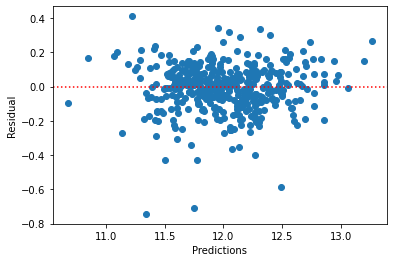

In [287]:
# Residual analysis
y_res = y_test - y_pred_test
plt.scatter( y_pred_test , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

#### Comments
Errors are randomly distributed with no clear pattern between residuals and predictions

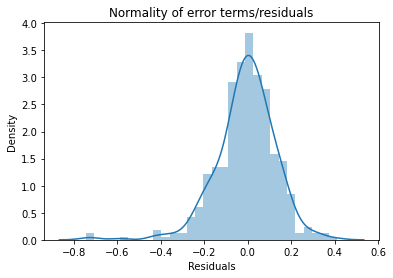

In [288]:
# Distribution of errors

sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Comments
Error terms are normally distributed

### Ridge Regression

In [221]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [222]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 20}


In [223]:
# Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.01153585  0.02215518  0.0856198   0.06015715  0.03546962  0.0485231
  0.0369916   0.03896085  0.06564848  0.01354099  0.01329284  0.0143307
 -0.01883467  0.01467455  0.01690662  0.02082551  0.00986158  0.0155056
 -0.07907298  0.022703   -0.03502093  0.00945024  0.02076371 -0.01974396
  0.03368004  0.01001862 -0.00777881  0.02512284  0.0263645   0.01125816
  0.05143494 -0.01972998 -0.02821303 -0.01945895 -0.05174347 -0.02789059
 -0.02495095  0.02357543 -0.03670056 -0.0127577 ]


In [234]:
X_train_rfe.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'EnclosedPorch', 'ScreenPorch', 'houseAge', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_OtherConfig', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Others',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_Others',
       'Foundation_Others', 'Foundation_PConc', 'BsmtExposure_Min/Nil',
       'HeatingQC_TA/Po', 'KitchenQual_TA/Fa', 'FireplaceQu_No_Fireplace',
       'FireplaceQu_TA/Fa/Po', 'GarageType_Basment', 'GarageType_Detchd',
       'GarageFinish_No_Garage', 'GarageFinish_Unf'],
      dtype='object')

### Making predictions on test dataset

In [225]:
# Creating X_test_rfe dataframe with RFE selected variables

X_test_rfe = X_test[col]
X_test_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,EnclosedPorch,ScreenPorch,houseAge,MSZoning_RL,MSZoning_RM,LotConfig_OtherConfig,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_Others,Foundation_Others,Foundation_PConc,BsmtExposure_Min/Nil,HeatingQC_TA/Po,KitchenQual_TA/Fa,FireplaceQu_No_Fireplace,FireplaceQu_TA/Fa/Po,GarageType_Basment,GarageType_Detchd,GarageFinish_No_Garage,GarageFinish_Unf
1292,-0.495424,-0.784460,-0.828305,-1.440046,-1.007732,-0.144731,0.607190,1.480171,1.742362,-0.823135,0.805564,-0.769504,4.181774,2.739321,-1.030238,-0.188971,-0.355600,-0.256542,2.588042,0,1,0,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0
990,0.639070,-0.088470,1.405879,-0.519376,1.489122,0.847468,0.686750,1.459414,1.783006,1.114338,0.805564,1.189590,-0.220558,0.284693,1.671937,1.850528,-0.355600,-0.256542,-0.829093,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
417,0.845342,3.076185,-0.083577,0.401294,1.614663,0.783296,0.585242,2.079839,2.254470,1.114338,0.805564,1.189590,-0.220558,2.125664,1.671937,1.822590,-0.355600,-0.256542,1.741894,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1
425,-0.495424,-1.570743,0.661151,2.242634,-1.007732,-0.991309,-1.233671,0.760571,-0.255264,-0.823135,-1.038365,1.189590,-0.220558,-0.328965,-1.030238,-1.082998,1.718521,-0.256542,0.830658,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1
691,1.773564,2.860213,2.895335,0.401294,2.374878,3.434098,3.531716,3.505202,5.692907,-0.823135,2.649493,1.189590,-0.220558,2.125664,1.671937,1.673585,-0.355600,-0.256542,-0.731460,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [226]:
X_test_rfe.shape

(428, 40)

In [229]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

print('R2 score:')

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train score: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test score: ',r2_test_lr)
metric2.append(r2_test_lr)

print('RSS(Sum of squares of residuals):')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train score: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test score: ',rss2_lr)
metric2.append(rss2_lr)

print('RMSE:')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train score: ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test score: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score:
Train score:  0.9118450556381843
Test score:  0.9047561814545116
RSS(Sum of squares of residuals):
Train score:  12.99740307962908
Test score:  7.12176460796889
RMSE:
Train score:  0.013023449979588257
Test score:  0.016639636934506753


### Lasso Regression

In [230]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [231]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.001}


In [232]:
# Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
print(lasso.coef_)

[ 9.83298052e-03  2.32655785e-02  8.89725526e-02  6.17442057e-02
  3.58539261e-02  5.00852217e-02  8.20716127e-04  0.00000000e+00
  1.15220985e-01  1.21644015e-02  9.68056046e-03  1.11871963e-02
 -1.64407994e-02  1.12801854e-02  1.83631044e-02  2.05313449e-02
  9.62184012e-03  1.45056020e-02 -8.53252626e-02  1.86677283e-02
 -3.48308022e-02  0.00000000e+00  3.80977437e-03 -1.62188678e-05
  2.29428266e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.09134152e-02  3.17159056e-03  5.15910219e-02 -1.39555307e-02
 -2.77707071e-02 -1.62438986e-02 -5.28944106e-02 -2.53752839e-02
 -0.00000000e+00  1.82139777e-02 -2.32758180e-02 -2.79485806e-03]


In [237]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

print('R2 score:')

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train score: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test score: ',r2_test_lr)
metric2.append(r2_test_lr)

print('RSS(Sum of squares of residuals):')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train score: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test score: ',rss2_lr)
metric2.append(rss2_lr)

print('RMSE:')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train score: ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test score: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score:
Train score:  0.9103731547522439
Test score:  0.9057666204059006
RSS(Sum of squares of residuals):
Train score:  13.21441744276352
Test score:  7.04621001059543
RMSE:
Train score:  0.013240899241246011
Test score:  0.01646310750139119


In [236]:
# Top 5 predictors based on Ridge regression

coef_df = pd.DataFrame({'Predictors':X_train_rfe.columns,'Ridge_Coeffs':ridge.coef_,'Lasso_coeffs':lasso.coef_})
coef_df.sort_values('Ridge_Coeffs',ascending=False).head()

,Predictors,Ridge_Coeffs,Lasso_coeffs
2,OverallQual,0.085620,0.088973
8,GrLivArea,0.065648,0.115221
3,OverallCond,0.060157,0.061744
30,Foundation_PConc,0.051435,0.051591
5,TotalBsmtSF,0.048523,0.050085


In [242]:
# Top 5 predictors based on Lasso regression

coef_df.sort_values('Lasso_coeffs',ascending=False).head()

,Predictors,Ridge_Coeffs,Lasso_coeffs
8,GrLivArea,0.065648,0.115221
2,OverallQual,0.085620,0.088973
3,OverallCond,0.060157,0.061744
30,Foundation_PConc,0.051435,0.051591
5,TotalBsmtSF,0.048523,0.050085


#### Response to Question 1

In [238]:
# Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 40
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y_train)
print(ridge2.coef_)

[ 0.01117594  0.02220235  0.08583128  0.05772372  0.03526284  0.04809062
  0.03718645  0.03749456  0.06155789  0.01371965  0.01559542  0.01579022
 -0.0198124   0.01693507  0.01971707  0.02188562  0.00881107  0.0155597
 -0.0738539   0.02176395 -0.03008843  0.00724134  0.01395364 -0.01397365
  0.02737526  0.00487507 -0.00214063  0.01443473  0.02281782  0.00599168
  0.04615774 -0.0181816  -0.02804299 -0.02285831 -0.04631004 -0.0224104
 -0.01579111  0.01904152 -0.02698351 -0.01130104]


In [239]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_rfe)

print('R2 score:')

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train score: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test score: ',r2_test_lr)
metric2.append(r2_test_lr)

print('RSS(Sum of squares of residuals):')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train score: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test score: ',rss2_lr)
metric2.append(rss2_lr)

print('RMSE:')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train score: ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test score: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score:
Train score:  0.9106991102309611
Test score:  0.9050484845534011
RSS(Sum of squares of residuals):
Train score:  13.166359165674576
Test score:  7.099907925863304
RMSE:
Train score:  0.013192744654984545
Test score:  0.016588569920241367


In [240]:
# Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised
alpha = 0.002
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train_rfe, y_train)
print(lasso2.coef_)

[ 0.00886146  0.02358042  0.09247393  0.06011289  0.0356913   0.05026422
  0.          0.          0.11502561  0.01120685  0.00684066  0.00895831
 -0.01621822  0.01205517  0.02225897  0.02205392  0.0072558   0.01366511
 -0.08552969  0.01475666 -0.02683046  0.          0.         -0.
  0.01292325 -0.          0.          0.          0.01019561  0.
  0.04562291 -0.00698856 -0.0272295  -0.01731671 -0.04356687 -0.01461429
 -0.          0.00858501 -0.         -0.        ]


In [241]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso2.predict(X_train_rfe)
y_pred_test = lasso2.predict(X_test_rfe)

print('R2 score:')

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train score: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test score: ',r2_test_lr)
metric2.append(r2_test_lr)

print('RSS(Sum of squares of residuals):')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train score: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test score: ',rss2_lr)
metric2.append(rss2_lr)

print('RMSE:')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train score: ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test score: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score:
Train score:  0.9082048270821984
Test score:  0.9061456887554793
RSS(Sum of squares of residuals):
Train score:  13.534111691796486
Test score:  7.017865540610312
RMSE:
Train score:  0.01356123416011672
Test score:  0.0163968821042297


In [243]:
# Top 5 predictors based on Ridge regression

coef_df2 = pd.DataFrame({'Predictors':X_train_rfe.columns,'Ridge_Coeffs':ridge2.coef_,'Lasso_coeffs':lasso2.coef_})
coef_df2.sort_values('Ridge_Coeffs',ascending=False).head()

,Predictors,Ridge_Coeffs,Lasso_coeffs
2,OverallQual,0.085831,0.092474
8,GrLivArea,0.061558,0.115026
3,OverallCond,0.057724,0.060113
5,TotalBsmtSF,0.048091,0.050264
30,Foundation_PConc,0.046158,0.045623


In [244]:
# Top 5 predictors based on Lasso regression

coef_df2.sort_values('Lasso_coeffs',ascending=False).head()

,Predictors,Ridge_Coeffs,Lasso_coeffs
8,GrLivArea,0.061558,0.115026
2,OverallQual,0.085831,0.092474
3,OverallCond,0.057724,0.060113
5,TotalBsmtSF,0.048091,0.050264
30,Foundation_PConc,0.046158,0.045623


#### Response to Question 3

In [252]:
todrop = coef_df.sort_values('Lasso_coeffs',ascending=False).head().Predictors.values
todrop

array(['GrLivArea', 'OverallQual', 'OverallCond', 'Foundation_PConc',
       'TotalBsmtSF'], dtype=object)

In [253]:
X_train_new = X_train_rfe.drop(todrop,axis=1)

In [254]:
X_test_new = X_test_rfe.drop(todrop,axis=1)

In [256]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)        # folds = 5; Cross Validation    
model_cv.fit(X_train_new, y_train)
print('Optimal Value of alpha: ',model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Optimal Value of alpha:
 {'alpha': 0.0001}


In [257]:
alpha = 0.0001
lasso_new = Lasso(alpha=alpha)
lasso_new.fit(X_train_new, y_train)

Lasso(alpha=0.0001)

In [258]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_new.predict(X_train_new)
y_pred_test = lasso_new.predict(X_test_new)

print('R2 score:')

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Train score: ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test score: ',r2_test_lr)
metric2.append(r2_test_lr)

print('RSS(Sum of squares of residuals):')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Train score: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test score: ',rss2_lr)
metric2.append(rss2_lr)

print('RMSE:')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train score: ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test score: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score:
Train score:  0.8668040163202082
Test score:  0.8484052551362696
RSS(Sum of squares of residuals):
Train score:  19.638171188317614
Test score:  11.335350736793092
RMSE:
Train score:  0.01967752624079921
Test score:  0.02648446433830162


In [261]:
# Top 5 predictors based on Lasso regression

coef_dfn = pd.DataFrame({'Predictors':X_train_new.columns,'Lasso_coeffs':lasso_new.coef_})
coef_dfn.sort_values('Lasso_coeffs',ascending=False).head().Predictors.values

array(['1stFlrSF', '2ndFlrSF', 'Exterior2nd_Wd Sdng',
       'Exterior1st_VinylSd', 'BsmtFinSF1'], dtype=object)